# **NBA Play-By-Play Data - 2023-2024 Season**
Brendan Keane
August 8, 2024

## **Summary**
This notebook scrapes the [NBA website](https://nba.com) for play-by-play data from the 2023-2024 season using *Python* and *Beautiful Soup*. This process is broken down into the following steps:
1. Import packages and define constants
1. Retrieve play-by-play JSON data from [nba.com](http://nba.com/game)
1. Save play-by-play JSON for all 1,230 NBA games
1. Combine all 1,230 JSONs into one CSV

## **1. Import packages and define constants**

In [10]:
# Imports
import os
import pandas as pd
import json

# Constants
fp = '../data/raw/S2324/game/'
files = os.listdir(fp)
print(f"{len(files)} files found in {fp}")

1230 files found in ../data/raw/S2324/game/


In [39]:
def game_details_to_df(files):
    """
    Function converts game details JSON to a dataframe
    """
    df = pd.DataFrame(columns=['game_id', 'home_team_id', 'home_team_name', 'home_team_city', 'home_team_tricode', 'home_team_wins', 'home_team_losses', 'home_team_score', 'away_team_id', 'away_team_name', 'away_team_city', 'away_team_tricode', 'away_team_wins', 'away_team_losses', 'away_team_score', 'arena', 'arena_city', 'arena_state', 'arena_country', 'arena_timezone', 'gameTimeET', 'gameTimeUTC', 'duration', 'attendance', 'sellout'])
    for file in files:
        tj = json.load(open(fp + file))
        game_details = {
          'game_id': tj['gameId'],
          'home_team_id': tj['homeTeam']['teamId'],
          'home_team_name': tj['homeTeam']['teamName'],
          'home_team_city': tj['homeTeam']['teamCity'],
          'home_team_tricode': tj['homeTeam']['teamTricode'],
          'home_team_wins': tj['homeTeam']['teamWins'],
          'home_team_losses': tj['homeTeam']['teamLosses'],
          'home_team_score': tj['homeTeam']['score'],
          'away_team_id': tj['awayTeam']['teamId'],
          'away_team_name': tj['awayTeam']['teamName'],
          'away_team_city': tj['awayTeam']['teamCity'],
          'away_team_tricode': tj['awayTeam']['teamTricode'],
          'away_team_wins': tj['awayTeam']['teamWins'],
          'away_team_losses': tj['awayTeam']['teamLosses'],
          'away_team_score': tj['awayTeam']['score'],
          'arena': tj['arena']['arenaName'],
          'arena_city': tj['arena']['arenaCity'],
          'arena_state': tj['arena']['arenaState'],
          'arena_country': tj['arena']['arenaCountry'],
          'arena_timezone': tj['arena']['arenaTimezone'],
          'gameTimeET': tj['gameEt'],
          'gameTimeUTC': tj['gameTimeUTC'],
          'duration': tj['duration'],
          'attendance': tj['attendance'],
          'sellout': tj['sellout']
        }
        df.loc[len(df)] = game_details
    return df

df = game_details_to_df(files)
df.sample(5)



,game_id,home_team_id,home_team_name,home_team_city,home_team_tricode,home_team_wins,home_team_losses,home_team_score,away_team_id,away_team_name,...,arena,arena_city,arena_state,arena_country,arena_timezone,gameTimeET,gameTimeUTC,duration,attendance,sellout
942,0022301091,1610612741,Bulls,Chicago,CHI,36,40,101,1610612737,Hawks,...,United Center,Chicago,IL,US,Central,2024-04-01T20:00:00Z,2024-04-02T00:00:00Z,2:07,21114,1
400,0022301144,1610612766,Hornets,Charlotte,CHA,19,60,104,1610612742,Mavericks,...,Spectrum Center,Charlotte,NC,US,Eastern,2024-04-09T19:00:00Z,2024-04-09T23:00:00Z,2:01,17425,0
702,0022300686,1610612762,Jazz,Utah,UTA,24,26,124,1610612755,76ers,...,Delta Center,Salt Lake City,UT,US,Mountain,2024-02-01T22:00:00Z,2024-02-02T03:00:00Z,2:26,18206,1
1200,0022300814,1610612765,Pistons,Detroit,DET,8,48,109,1610612753,Magic,...,Little Caesars Arena,Detroit,MI,US,Eastern,2024-02-24T20:00:00Z,2024-02-25T01:00:00Z,2:10,19388,0
89,0022300821,1610612737,Hawks,Atlanta,ATL,25,32,109,1610612753,Magic,...,State Farm Arena,Atlanta,GA,US,Eastern,2024-02-25T19:00:00Z,2024-02-26T00:00:00Z,2:06,17173,1


In [40]:
df.to_csv('../data/processed/S2324_all_game.csv', index=False)

In [56]:
df = pd.read_csv('../data/processed/S2324_all_game.csv')
df['home_win'] = None
for index in range(len(df)):
    if df.loc[index, 'home_team_score'] > df.loc[index, 'away_team_score']:
        df.loc[index, 'home_win'] = 1
    else:
        df.loc[index, 'home_win'] = 0

attendance = ['home_win', 'home_team_tricode', 'arena', 'attendance', 'sellout', 'gameTimeET', 'gameTimeUTC', 'duration']
attendance_df = df[attendance]

simple = ['home_win', 'home_team_tricode', 'away_team_tricode', 'home_team_score', 'away_team_score', 'arena', 'gameTimeET', 'duration', 'attendance', 'sellout']
simple_df = df[simple]
simple_df['home_win'] = None






attendance_df.to_csv('../data/processed/S2324_attendance.csv', index=False)
simple_df.to_csv('../data/processed/S2324_game_simple.csv', index=False)



/var/folders/6m/88wxxv_j6vjbktrf88ghl0t80000gn/T/ipykernel_30519/2979881191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_df['home_win'] = None


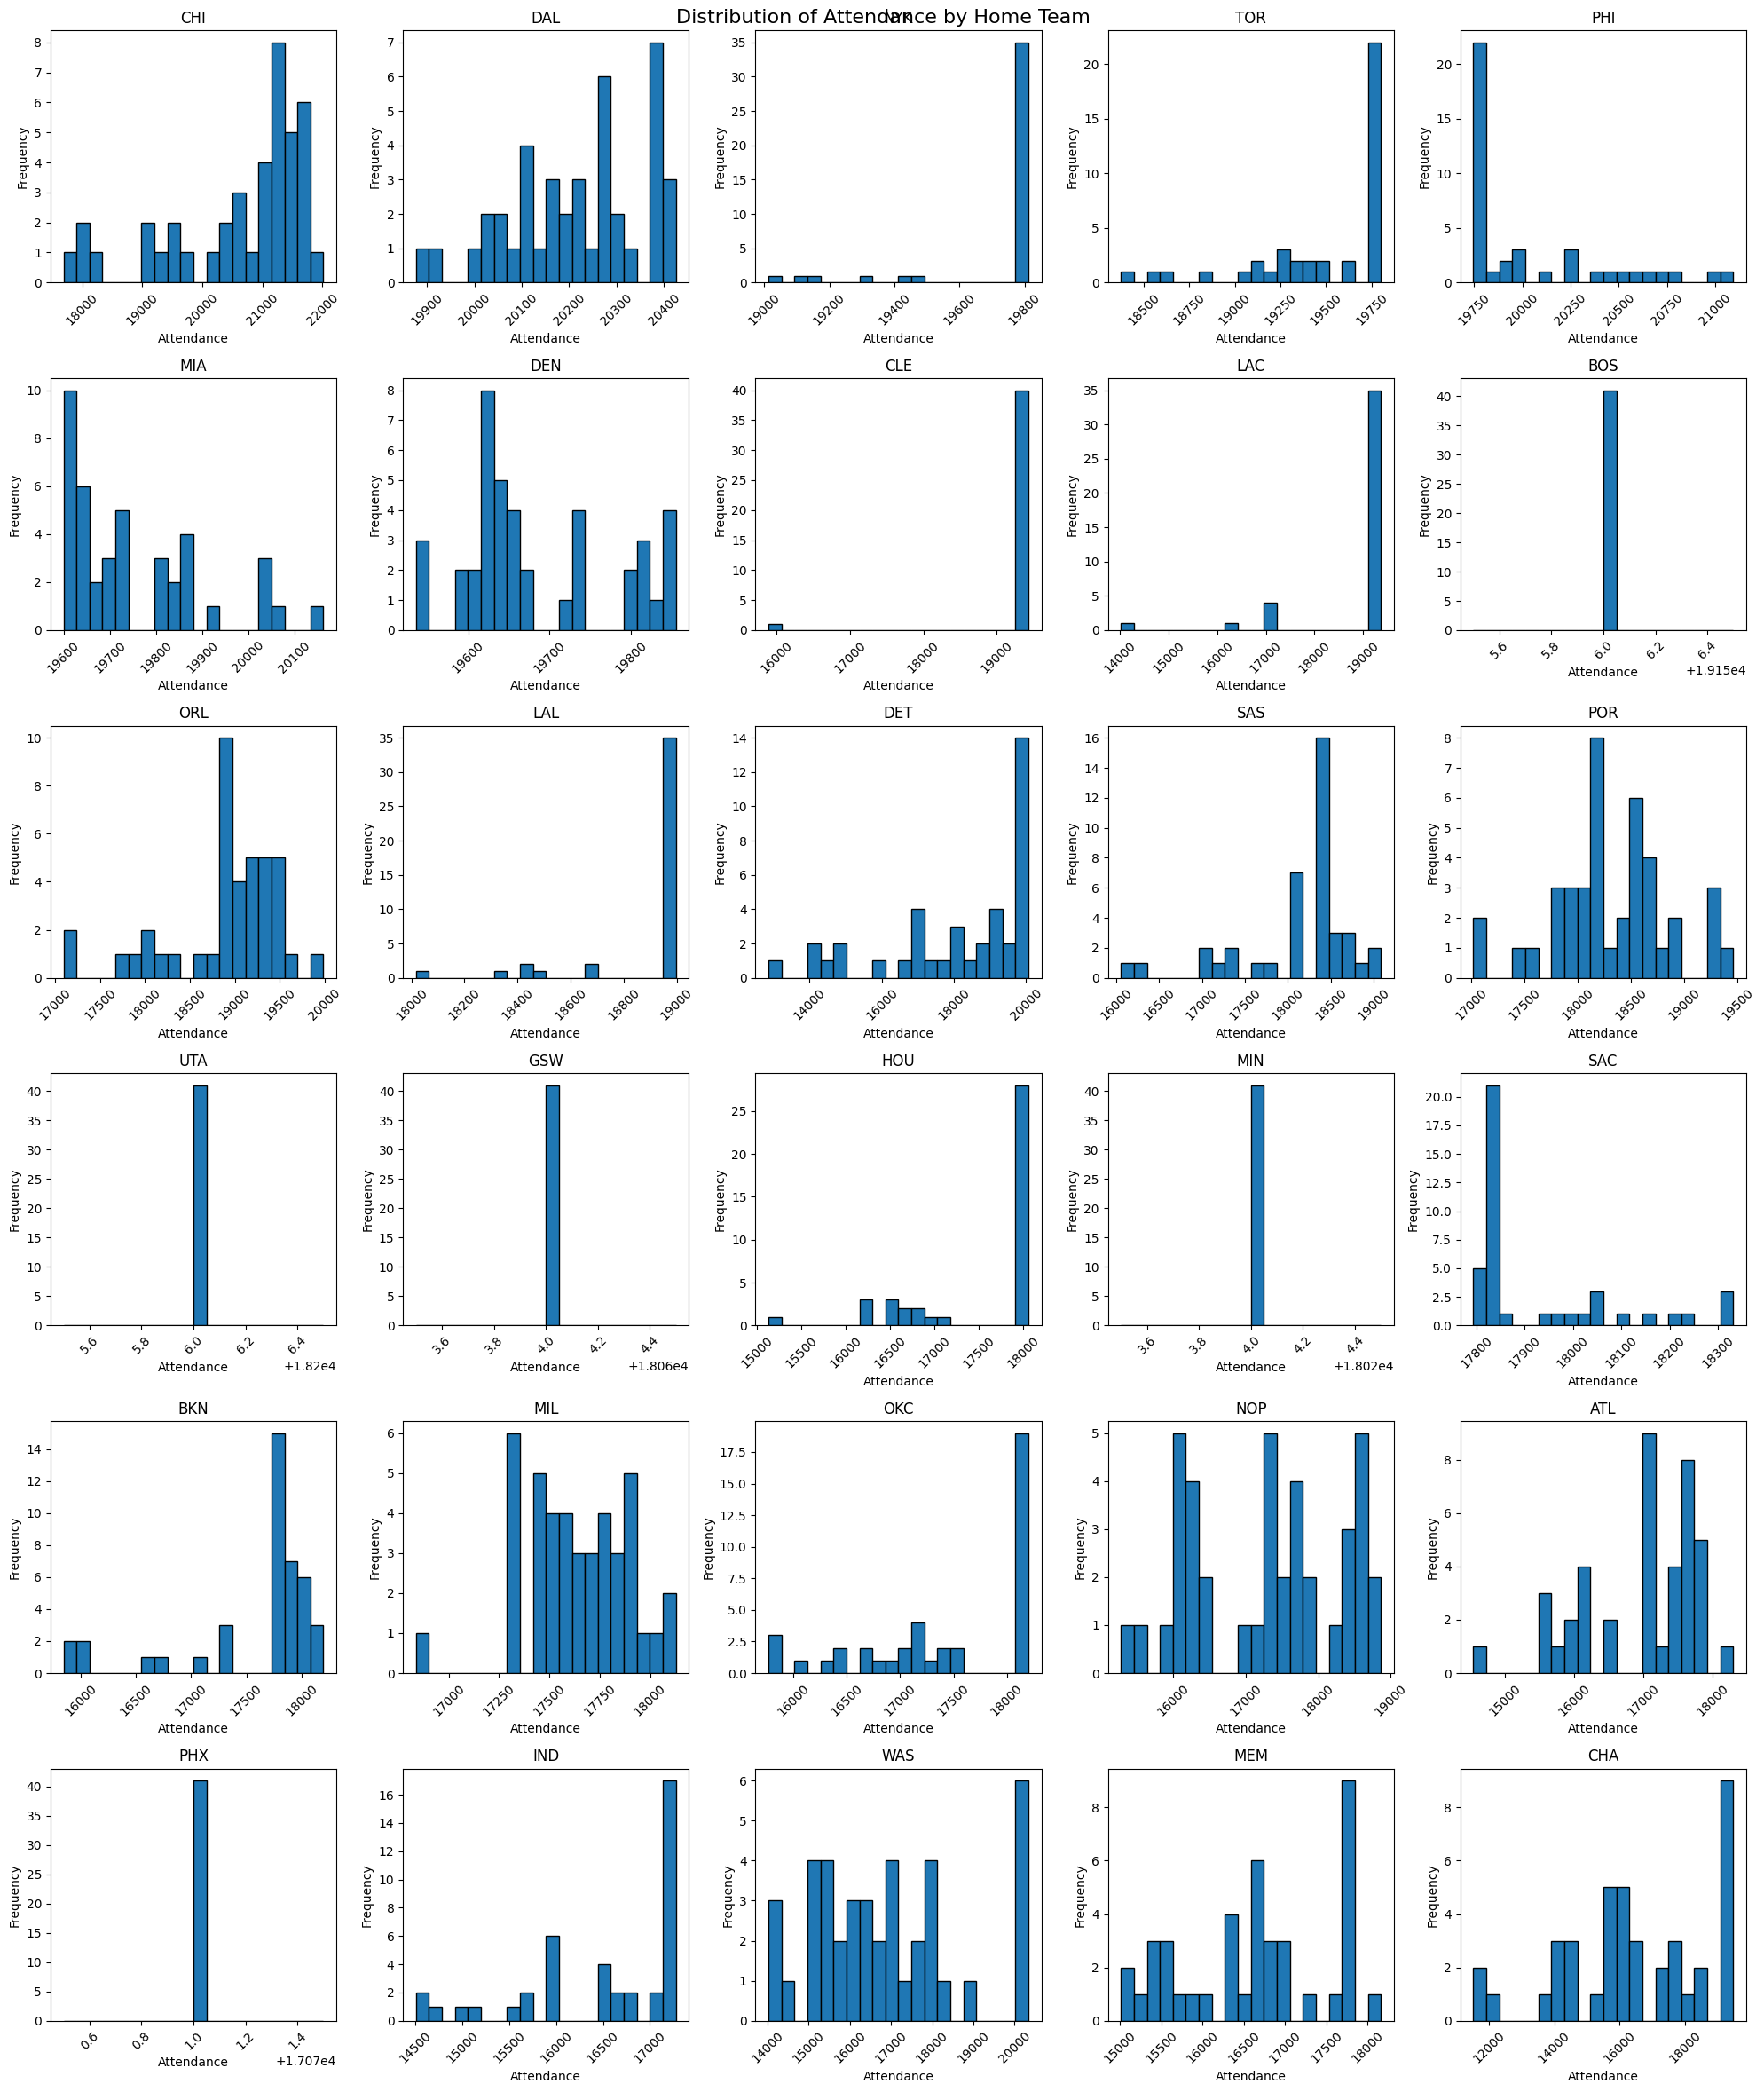

In [61]:
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('../data/processed/S2324_attendance.csv')

# Calculate the number of rows and columns for the small multiples
n_teams = df['home_team_tricode'].nunique()
n_cols = 5
n_rows = (n_teams + n_cols - 1) // n_cols

# Create the figure and axes for small multiples
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows), squeeze=False)
fig.suptitle('Distribution of Attendance by Home Team', fontsize=16)

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

# Sort teams by median attendance (descending) for a more informative layout
team_order = df.groupby('home_team_tricode')['attendance'].median().sort_values(ascending=False).index

# Create a histogram for each team
for i, team in enumerate(team_order):
    team_data = df[df['home_team_tricode'] == team]['attendance']
    ax = axes_flat[i]
    ax.hist(team_data, bins=20, edgecolor='black')
    ax.set_title(team)
    ax.set_xlabel('Attendance')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()





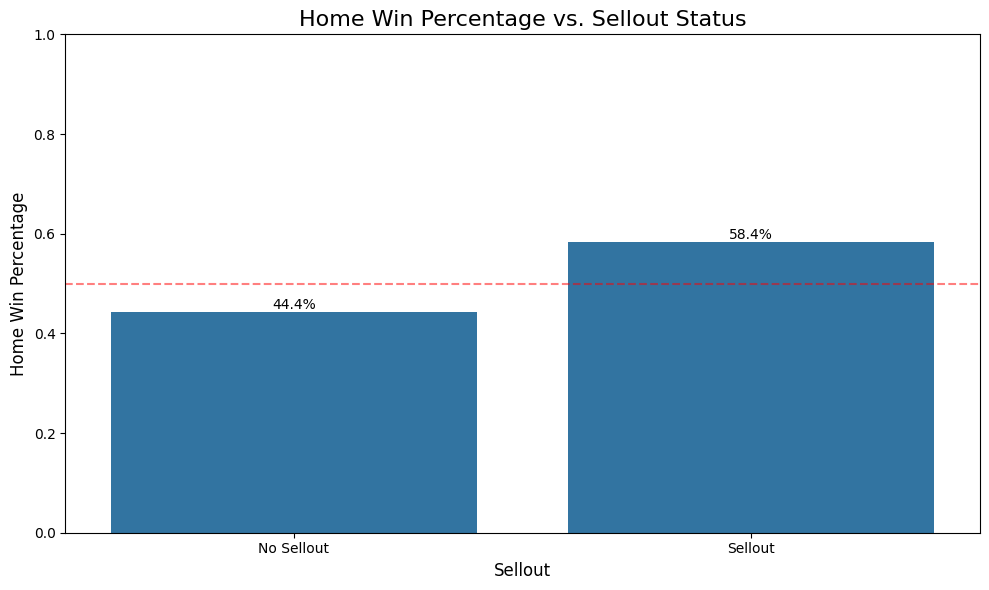

sellout
0    44.38%
1    58.35%
Name: home_win, dtype: object

Chi-square test p-value: 0.0000
If p-value < 0.05, there is a statistically significant relationship between sellout status and home wins.


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('../data/processed/S2324_all_game.csv')

# Create a new column for home win
df['home_win'] = df['home_team_score'] > df['away_team_score']

# Group by sellout and calculate the average home win percentage
grouped_data = df.groupby('sellout')['home_win'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sellout', y='home_win', data=grouped_data)

# Customize the plot
plt.title('Home Win Percentage vs. Sellout Status', fontsize=16)
plt.xlabel('Sellout', fontsize=12)
plt.ylabel('Home Win Percentage', fontsize=12)
plt.xticks([0, 1], ['No Sellout', 'Sellout'])
plt.ylim(0, 1)

# Add percentage labels on top of each bar
for i, row in grouped_data.iterrows():
    plt.text(i, row['home_win'], f"{row['home_win']:.1%}", 
             ha='center', va='bottom')

# Add a horizontal line for 50% win rate
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print the exact percentages
print(grouped_data.set_index('sellout')['home_win'].apply(lambda x: f"{x:.2%}"))

# Perform a chi-square test to check for statistical significance
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['sellout'], df['home_win'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test p-value: {p_value:.4f}")
print("If p-value < 0.05, there is a statistically significant relationship between sellout status and home wins.")


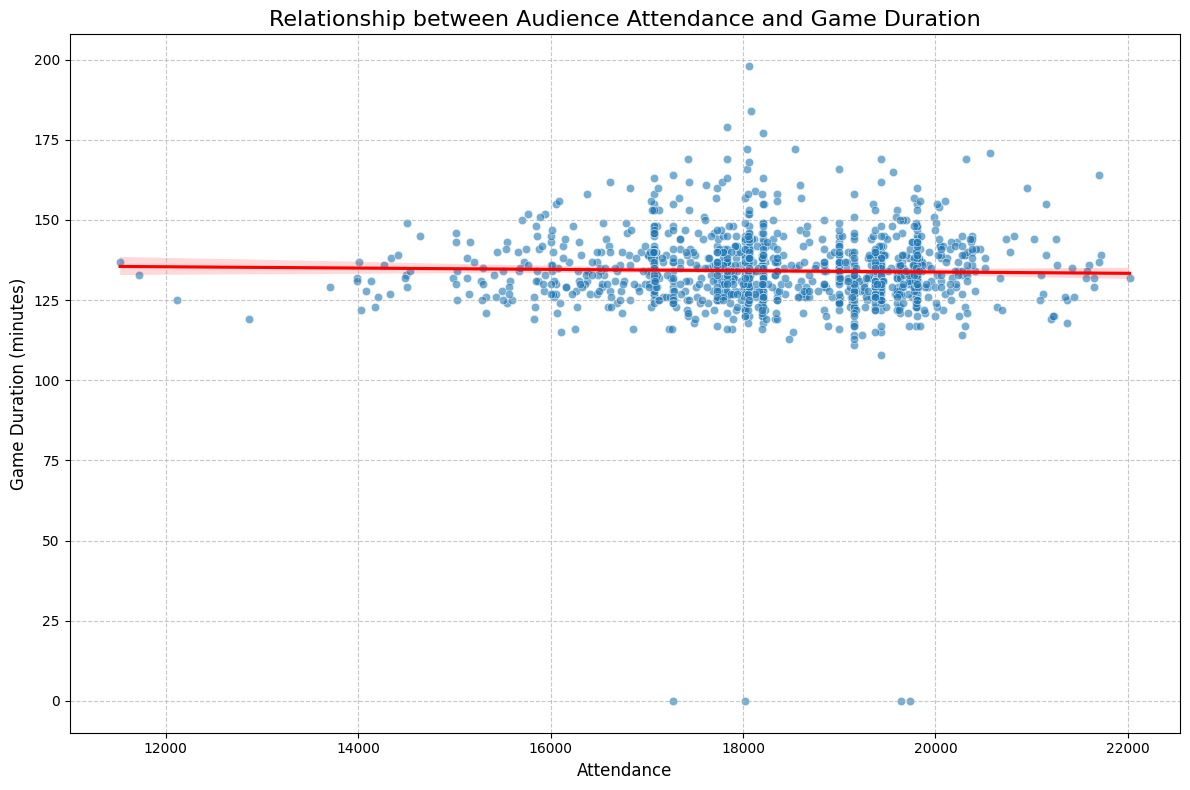

Correlation coefficient between attendance and game duration: -0.0234

Linear regression results:
Slope: -0.0002
Intercept: 137.8706
R-squared: 0.0005
P-value: 0.4113
There is no statistically significant relationship between attendance and game duration.

Average game duration for sellout games: 134.36 minutes
Average game duration for non-sellout games: 133.54 minutes


In [65]:
# Analyze the relationship between audience attendance and game duration

# Convert duration to minutes
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='attendance', y='duration_minutes', data=df, alpha=0.6)

# Add a trend line
sns.regplot(x='attendance', y='duration_minutes', data=df, scatter=False, color='red')

# Customize the plot
plt.title('Relationship between Audience Attendance and Game Duration', fontsize=16)
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Game Duration (minutes)', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = df['attendance'].corr(df['duration_minutes'])
print(f"Correlation coefficient between attendance and game duration: {correlation:.4f}")

# Perform a simple linear regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['attendance'], df['duration_minutes'])

print(f"\nLinear regression results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant relationship between attendance and game duration.")
else:
    print("There is no statistically significant relationship between attendance and game duration.")

# Calculate average game duration for sellout and non-sellout games
avg_duration_sellout = df[df['sellout'] == 1]['duration_minutes'].mean()
avg_duration_non_sellout = df[df['sellout'] == 0]['duration_minutes'].mean()

print(f"\nAverage game duration for sellout games: {avg_duration_sellout:.2f} minutes")
print(f"Average game duration for non-sellout games: {avg_duration_non_sellout:.2f} minutes")


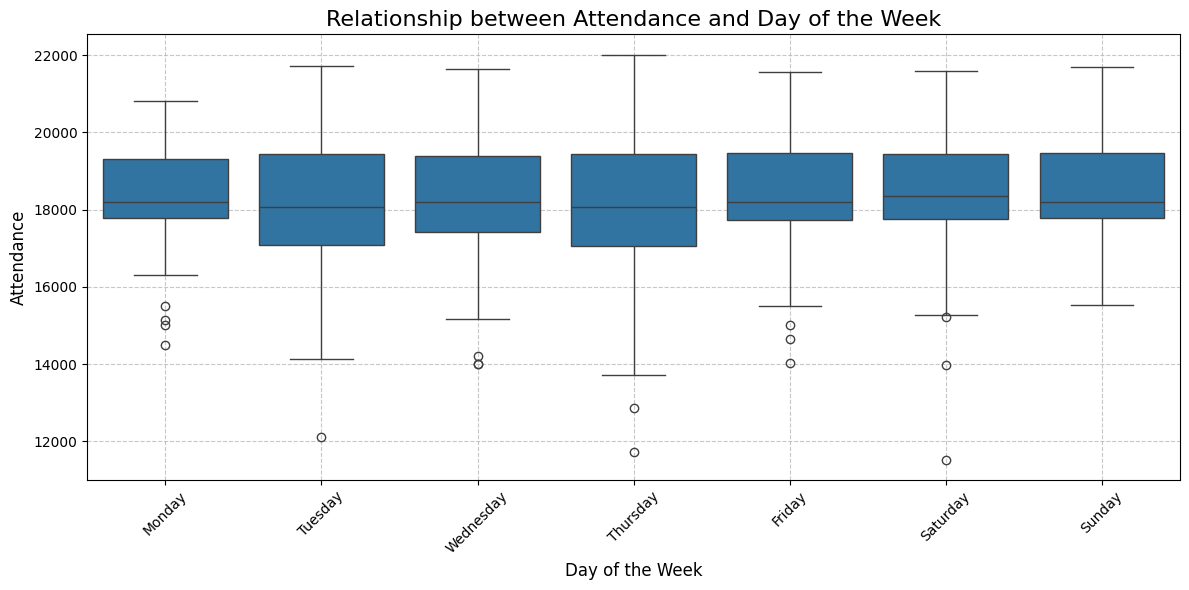

Average attendance by day of the week:
game_day
Sunday       18531.359091
Saturday     18458.336100
Friday       18437.938776
Monday       18335.977011
Wednesday    18282.274390
Tuesday      18126.271605
Thursday     18051.301435
Name: attendance, dtype: float64

One-way ANOVA results:
F-statistic: 3.0706
p-value: 0.0055
There is a statistically significant difference in attendance across days of the week.


In [66]:
# Convert gameTimeUTC to datetime and extract day of the week
df['game_day'] = pd.to_datetime(df['gameTimeUTC']).dt.day_name()

# Create a box plot to show the relationship between attendance and day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='game_day', y='attendance', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Customize the plot
plt.title('Relationship between Attendance and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Attendance', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate average attendance for each day of the week
avg_attendance_by_day = df.groupby('game_day')['attendance'].mean().sort_values(ascending=False)

print("Average attendance by day of the week:")
print(avg_attendance_by_day)

# Perform one-way ANOVA to test if there's a significant difference in attendance across days
from scipy import stats

days = df['game_day'].unique()
attendance_by_day = [df[df['game_day'] == day]['attendance'] for day in days]
f_statistic, p_value = stats.f_oneway(*attendance_by_day)

print(f"\nOne-way ANOVA results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in attendance across days of the week.")
else:
    print("There is no statistically significant difference in attendance across days of the week.")


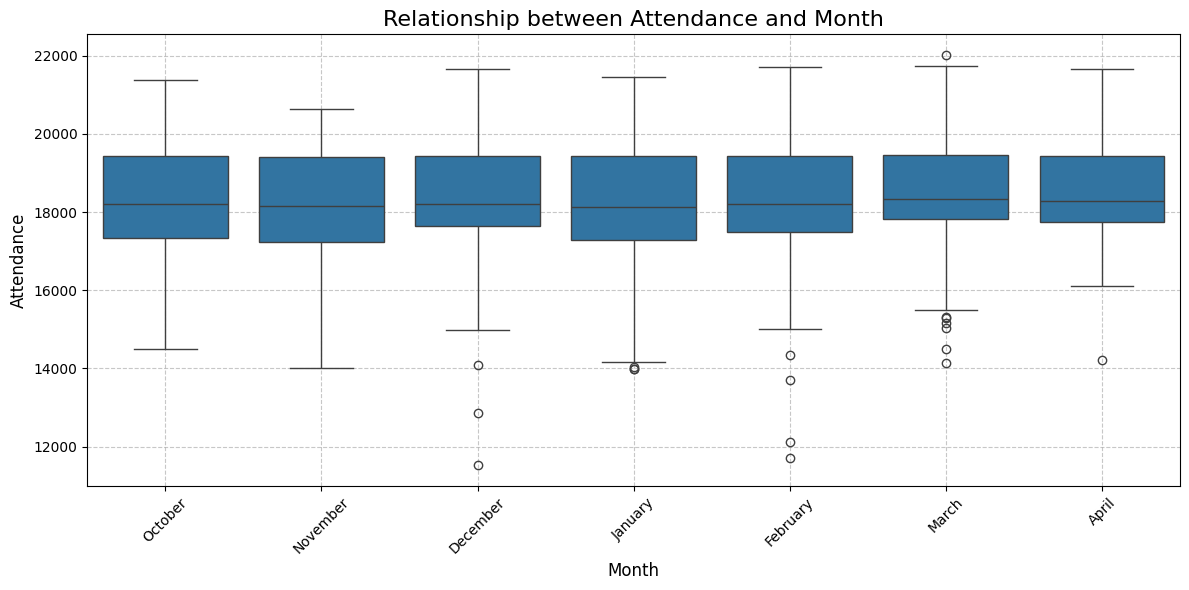

Average attendance by month:
game_month
April       18544.836207
March       18475.261603
December    18335.246445
February    18325.147727
January     18215.730088
October     18179.288462
November    18172.438679
Name: attendance, dtype: float64

One-way ANOVA results:
F-statistic: 1.5862
p-value: 0.1476
There is no statistically significant difference in attendance across months.


In [67]:
# Convert gameTimeUTC to datetime and extract month
df['game_month'] = pd.to_datetime(df['gameTimeUTC']).dt.strftime('%B')

# Create a box plot to show the relationship between attendance and month
plt.figure(figsize=(12, 6))
sns.boxplot(x='game_month', y='attendance', data=df, order=['October', 'November', 'December', 'January', 'February', 'March', 'April'])

# Customize the plot
plt.title('Relationship between Attendance and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Attendance', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate average attendance for each month
avg_attendance_by_month = df.groupby('game_month')['attendance'].mean().sort_values(ascending=False)

print("Average attendance by month:")
print(avg_attendance_by_month)

# Perform one-way ANOVA to test if there's a significant difference in attendance across months
months = df['game_month'].unique()
attendance_by_month = [df[df['game_month'] == month]['attendance'] for month in months]
f_statistic, p_value = stats.f_oneway(*attendance_by_month)

print(f"\nOne-way ANOVA results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in attendance across months.")
else:
    print("There is no statistically significant difference in attendance across months.")


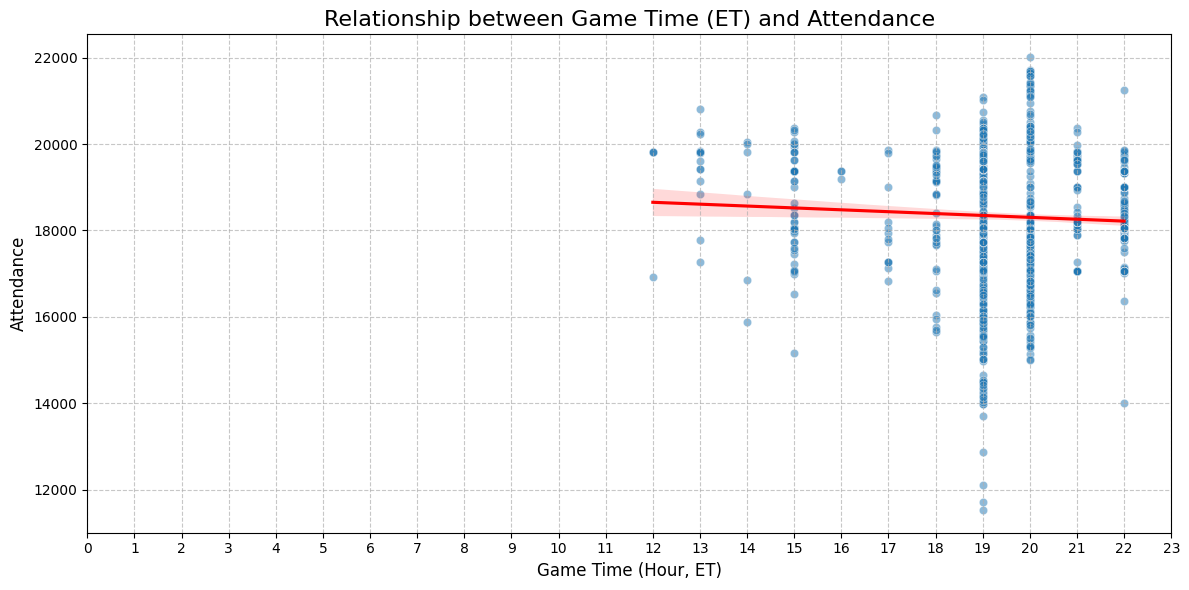

Average attendance by hour (ET):
game_hour
13    19437.071429
16    19307.333333
12    19089.500000
15    18597.574468
14    18577.333333
21    18472.848485
18    18455.022222
22    18355.848958
19    18269.777320
20    18223.198758
17    18012.615385
Name: attendance, dtype: float64

One-way ANOVA results:
F-statistic: 1.7243
p-value: 0.0705
There is no statistically significant difference in attendance across game times.


In [76]:
# Convert gameTimeET to datetime and extract hour
df['game_hour'] = pd.to_datetime(df['gameTimeET']).dt.hour

# Create a scatter plot to show the relationship between game time and attendance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='game_hour', y='attendance', data=df, alpha=0.5)

# Add a trend line
sns.regplot(x='game_hour', y='attendance', data=df, scatter=False, color='red')

# Customize the plot
plt.title('Relationship between Game Time (ET) and Attendance', fontsize=16)
plt.xlabel('Game Time (Hour, ET)', fontsize=12)
plt.ylabel('Attendance', fontsize=12)

# Set x-axis ticks to show hours
plt.xticks(range(0, 24))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate average attendance for each hour
avg_attendance_by_hour = df.groupby('game_hour')['attendance'].mean().sort_values(ascending=False)

print("Average attendance by hour (ET):")
print(avg_attendance_by_hour)

# Perform one-way ANOVA to test if there's a significant difference in attendance across hours
hours = df['game_hour'].unique()
attendance_by_hour = [df[df['game_hour'] == hour]['attendance'] for hour in hours]
f_statistic, p_value = stats.f_oneway(*attendance_by_hour)

print(f"\nOne-way ANOVA results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in attendance across game times.")
else:
    print("There is no statistically significant difference in attendance across game times.")


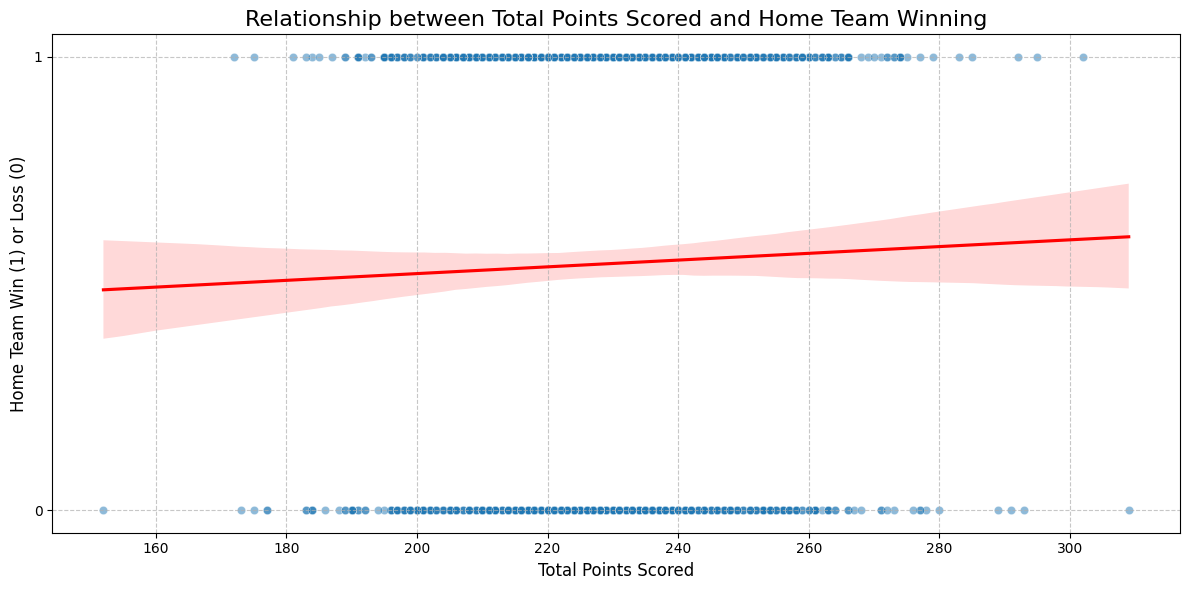

Correlation coefficient between total points and home team winning: 0.0303
Odds ratio: 1.0030
This means that for each additional point scored in a game, 
the odds of the home team winning change by a factor of 1.0030

t-test results:
t-statistic: 1.0633
p-value: 0.2879
There is no statistically significant difference in total points between home team wins and losses.


In [78]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression

# Calculate total points scored in each game
df['total_points'] = df['home_team_score'] + df['away_team_score']

# Create a new column for home team win (1 if home team won, 0 if away team won)
df['home_win'] = (df['home_team_score'] > df['away_team_score']).astype(int)

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_points', y='home_win', data=df, alpha=0.5)

# Add a trend line
sns.regplot(x='total_points', y='home_win', data=df, scatter=False, color='red')

# Customize the plot
plt.title('Relationship between Total Points Scored and Home Team Winning', fontsize=16)
plt.xlabel('Total Points Scored', fontsize=12)
plt.ylabel('Home Team Win (1) or Loss (0)', fontsize=12)

# Set y-axis ticks to show only 0 and 1
plt.yticks([0, 1])

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = df['total_points'].corr(df['home_win'])
print(f"Correlation coefficient between total points and home team winning: {correlation:.4f}")

# Perform logistic regression
X = df['total_points'].values.reshape(-1, 1)
y = df['home_win'].values

model = LogisticRegression()
model.fit(X, y)

# Calculate and print the odds ratio
odds_ratio = np.exp(model.coef_[0])
print(f"Odds ratio: {odds_ratio[0]:.4f}")
print(f"This means that for each additional point scored in a game, ")
print(f"the odds of the home team winning change by a factor of {odds_ratio[0]:.4f}")

# Perform a statistical test (e.g., t-test) to check if there's a significant difference
# in total points between games where home team wins vs loses
home_win_points = df[df['home_win'] == 1]['total_points']
home_loss_points = df[df['home_win'] == 0]['total_points']

t_statistic, p_value = stats.ttest_ind(home_win_points, home_loss_points)

print(f"\nt-test results:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in total points between home team wins and losses.")
else:
    print("There is no statistically significant difference in total points between home team wins and losses.")



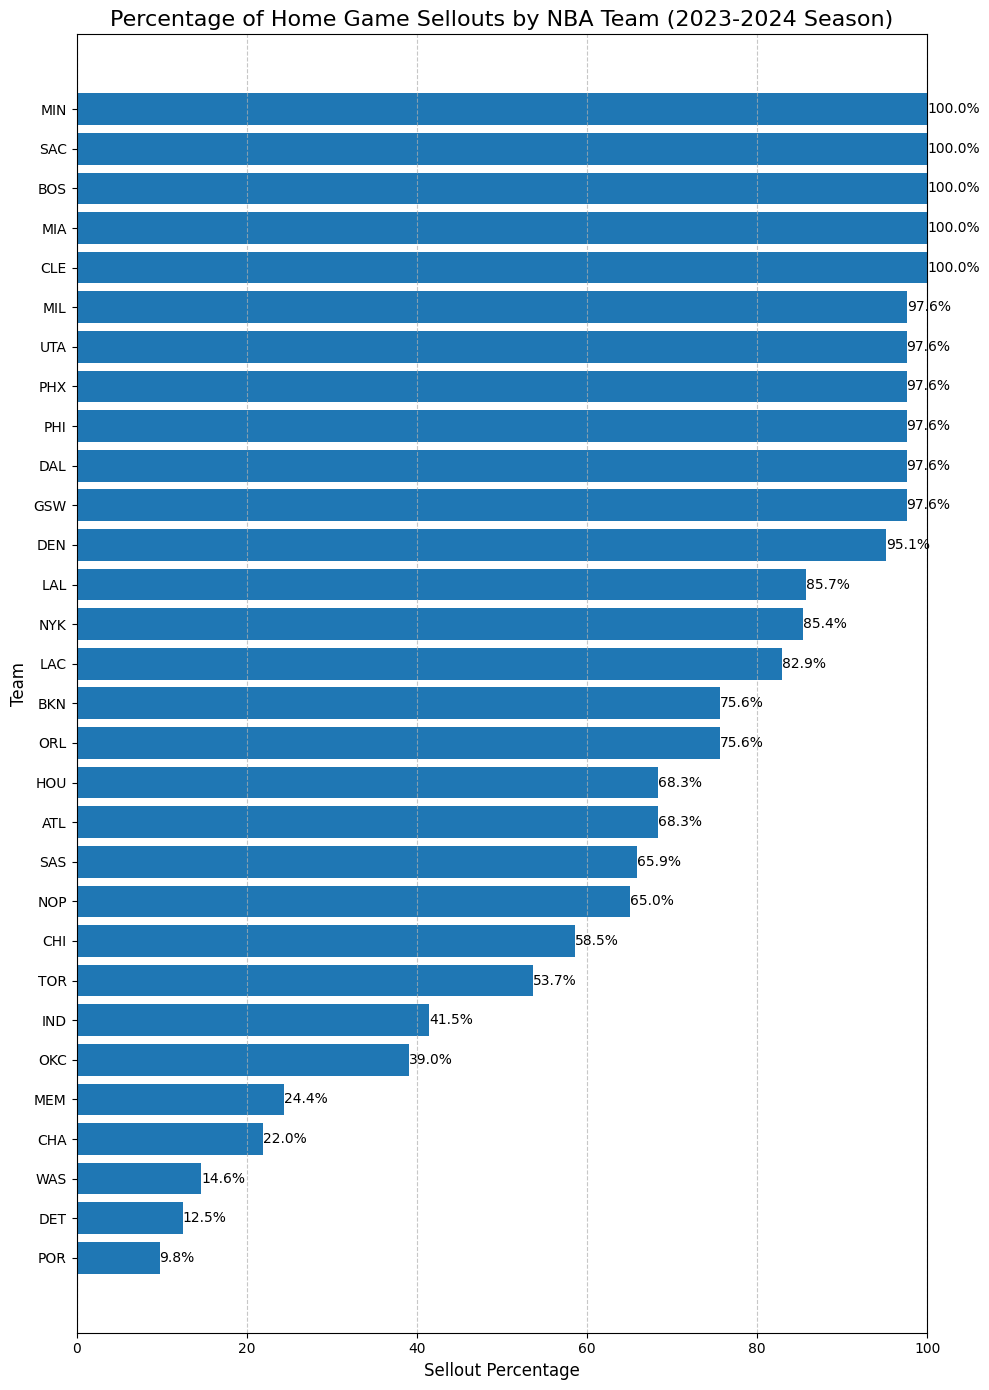

Team with highest sellout percentage: MIN (100.0%)
Team with lowest sellout percentage: POR (9.8%)
Average sellout percentage across all teams: 71.0%


In [80]:
# Calculate the percentage of sellouts for each team
sellout_percentages = df.groupby('home_team_tricode')['sellout'].mean() * 100

# Sort the percentages in descending order
sellout_percentages_sorted = sellout_percentages.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 14))
bars = plt.barh(sellout_percentages_sorted.index, sellout_percentages_sorted.values)

# Customize the plot
plt.title('Percentage of Home Game Sellouts by NBA Team (2023-2024 Season)', fontsize=16)
plt.ylabel('Team', fontsize=12)
plt.xlabel('Sellout Percentage', fontsize=12)
plt.xlim(0, 100)

# Add value labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%',
             ha='left', va='center')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Team with highest sellout percentage: {sellout_percentages_sorted.index[-1]} ({sellout_percentages_sorted.values[-1]:.1f}%)")
print(f"Team with lowest sellout percentage: {sellout_percentages_sorted.index[0]} ({sellout_percentages_sorted.values[0]:.1f}%)")
print(f"Average sellout percentage across all teams: {sellout_percentages.mean():.1f}%")



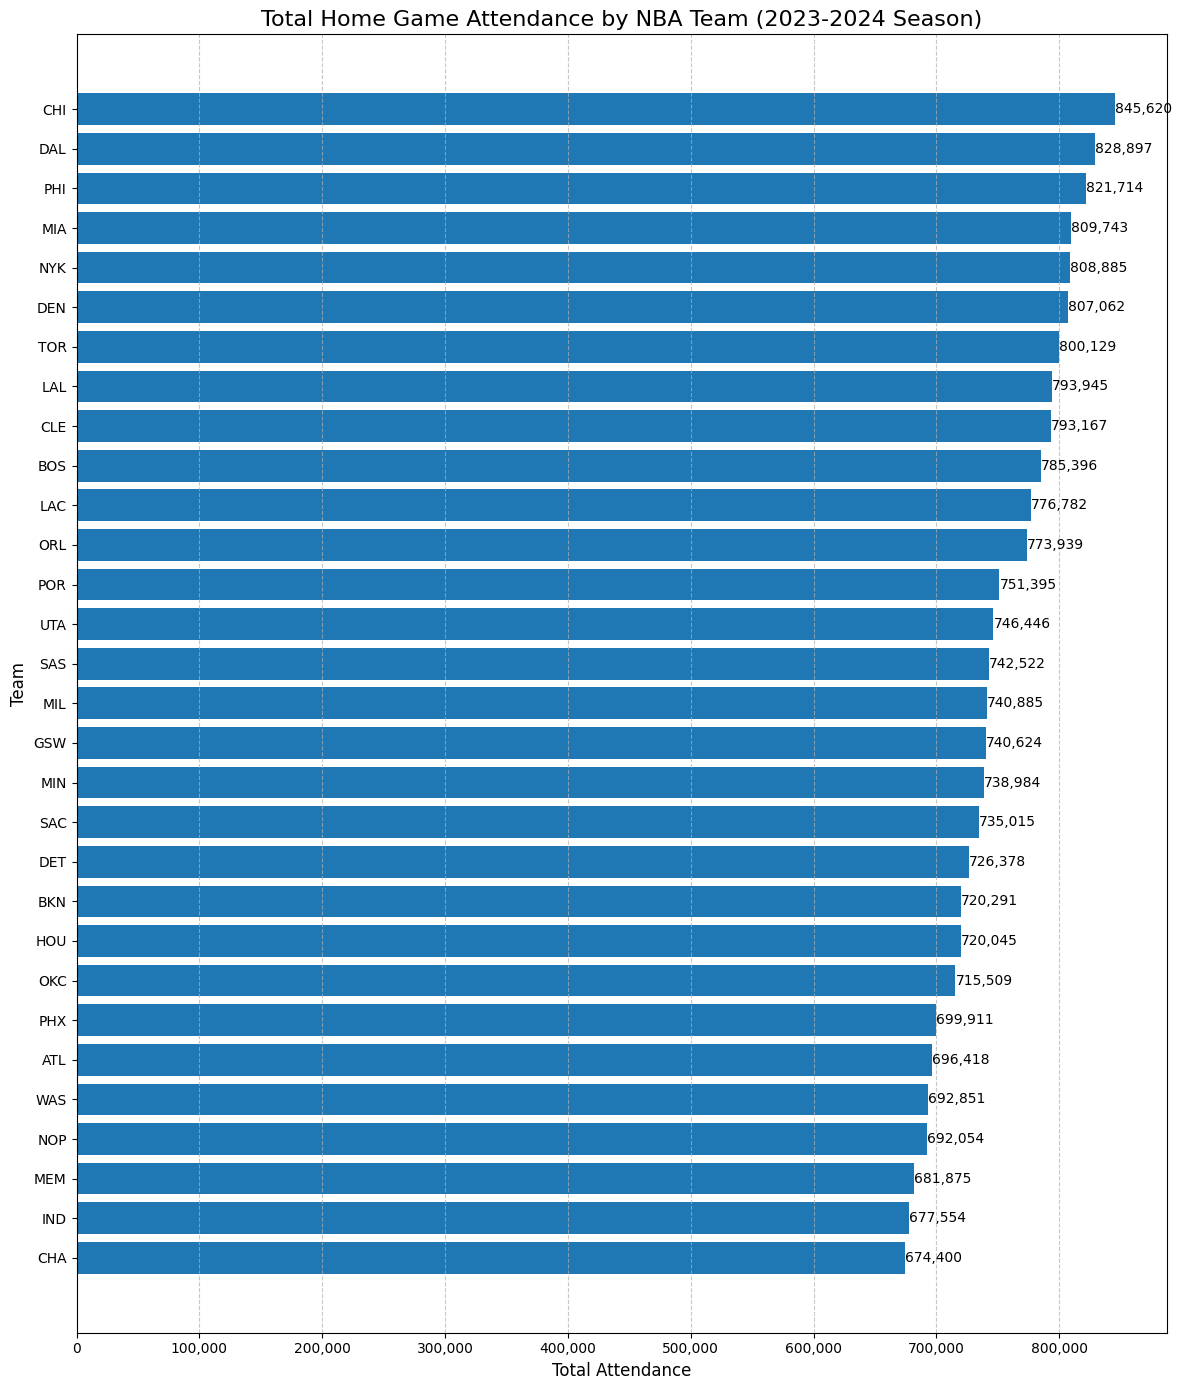

Team with highest total attendance: CHI (845,620)
Team with lowest total attendance: CHA (674,400)
Average total attendance across all teams: 751,281


In [85]:
# Calculate the total attendance for each team's home games
total_attendance = df.groupby('home_team_tricode')['attendance'].sum().sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 14))
bars = plt.barh(total_attendance.index, total_attendance.values)

# Customize the plot
plt.title('Total Home Game Attendance by NBA Team (2023-2024 Season)', fontsize=16)
plt.xlabel('Total Attendance', fontsize=12)
plt.ylabel('Team', fontsize=12)

# Add value labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             ha='left', va='center')

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to use comma as thousand separator
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Team with highest total attendance: {total_attendance.index[-1]} ({total_attendance.values[-1]:,.0f})")
print(f"Team with lowest total attendance: {total_attendance.index[0]} ({total_attendance.values[0]:,.0f})")
print(f"Average total attendance across all teams: {total_attendance.mean():,.0f}")



/var/folders/6m/88wxxv_j6vjbktrf88ghl0t80000gn/T/ipykernel_30519/31617473.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(total_attendance.iloc[i], text_positions[i], txt, fontsize=8, ha='center', va='center'))


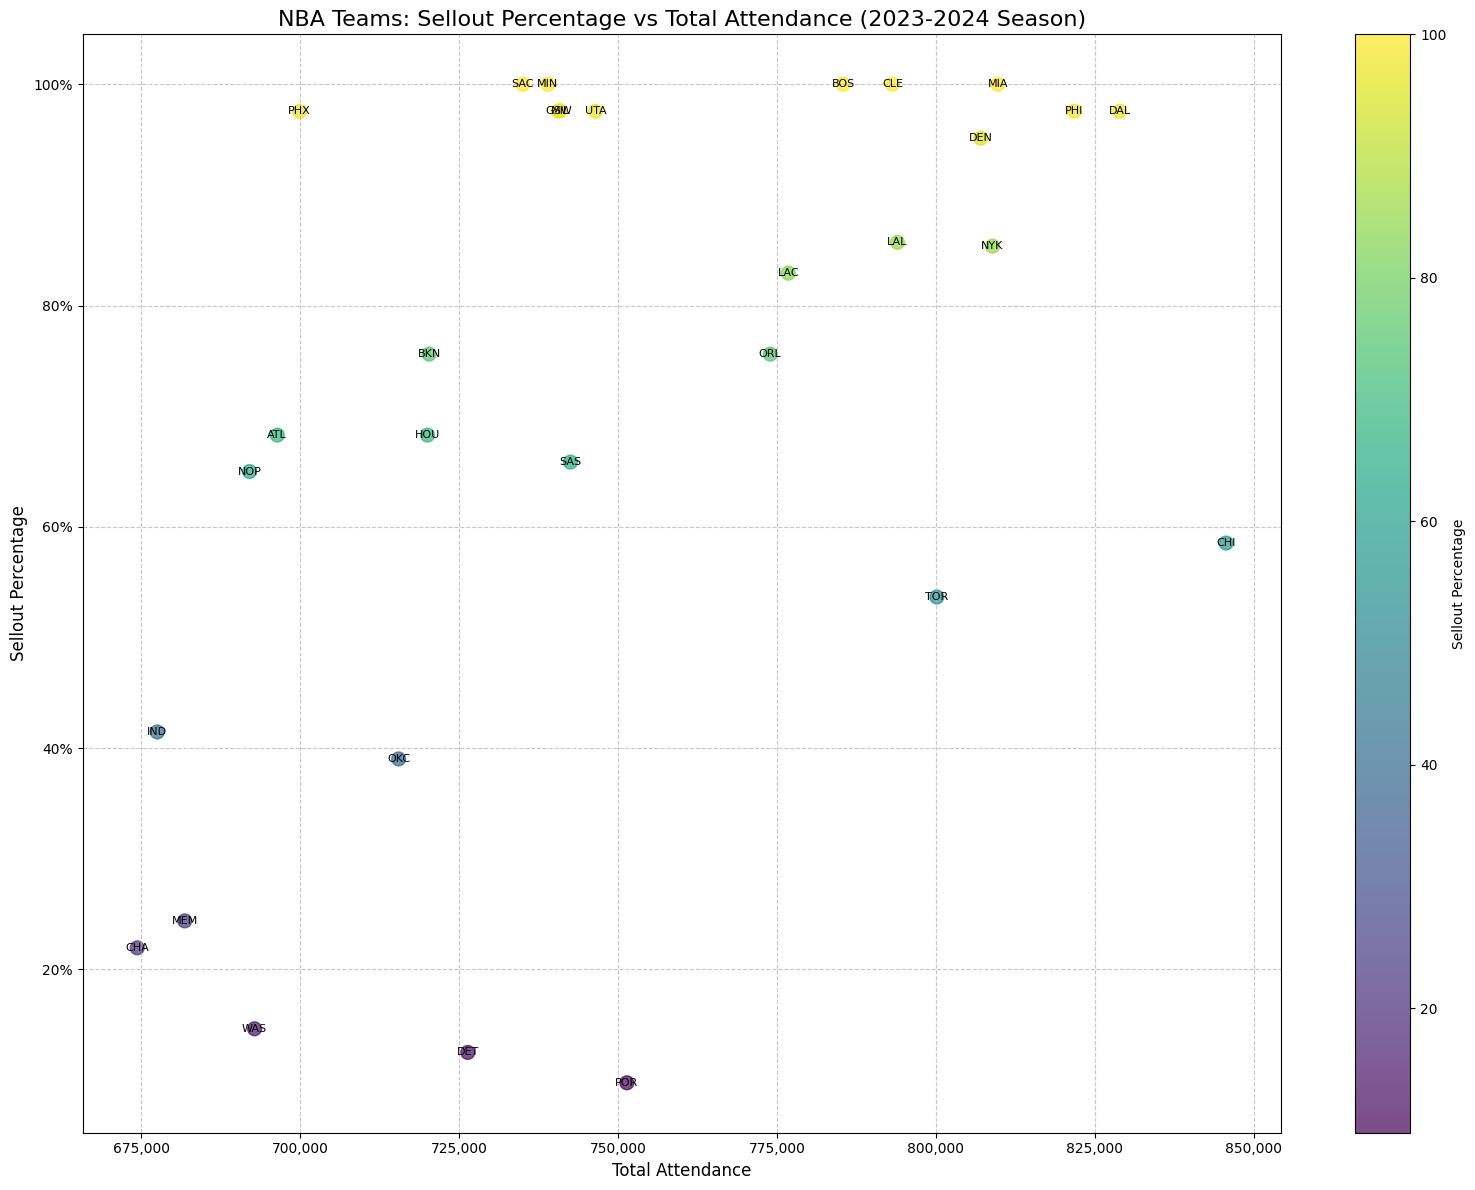

Team with highest sellout percentage: BOS (100.0%)
Team with lowest sellout percentage: POR (9.8%)
Team with highest total attendance: CHI (845,620)
Team with lowest total attendance: CHA (674,400)


In [88]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Calculate sellout percentage and total attendance for each team
sellout_percentage = df.groupby('home_team_tricode')['sellout'].mean() * 100
total_attendance = df.groupby('home_team_tricode')['attendance'].sum()

# Create a scatter plot
plt.figure(figsize=(16, 12))
scatter = plt.scatter(total_attendance, sellout_percentage, 
                      alpha=0.7, s=100, c=sellout_percentage, cmap='viridis')

# Customize the plot
plt.title('NBA Teams: Sellout Percentage vs Total Attendance (2023-2024 Season)', fontsize=16)
plt.xlabel('Total Attendance', fontsize=12)
plt.ylabel('Sellout Percentage', fontsize=12)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Sellout Percentage', fontsize=10)

# Format x-axis labels to use comma as thousand separator
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Function to calculate label positions with minimal overlap
def get_text_positions(x_data, y_data, txt_width, txt_height):
    a = zip(y_data, x_data)
    text_positions = y_data.copy()
    for index, (y, x) in enumerate(a):
        local_text_positions = [i for i in a if i[0] > (y - txt_height) 
                                and (abs(i[1] - x) < txt_width * 2) and i != (y,x)]
        if local_text_positions:
            sorted_ltp = sorted(local_text_positions)
            if abs(sorted_ltp[0][0] - y) < txt_height: #True == collision
                differ = np.diff(sorted_ltp, axis=0)
                a[index] = (sorted_ltp[-1][0] + txt_height, a[index][1])
                text_positions[index] = sorted_ltp[-1][0] + txt_height
                for k, (j, m) in enumerate(differ):
                    if j > txt_height * 1.5: #if diff is big enough 
                        a[index] = (sorted_ltp[k][0] + txt_height, a[index][1])
                        text_positions[index] = sorted_ltp[k][0] + txt_height
                        break
    return text_positions

# Add team labels to each point
texts = []
text_positions = get_text_positions(total_attendance, sellout_percentage, 40, 10)
for i, txt in enumerate(sellout_percentage.index):
    texts.append(plt.text(total_attendance.iloc[i], text_positions[i], txt, fontsize=8, ha='center', va='center'))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis to percentage format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Team with highest sellout percentage: {sellout_percentage.idxmax()} ({sellout_percentage.max():.1f}%)")
print(f"Team with lowest sellout percentage: {sellout_percentage.idxmin()} ({sellout_percentage.min():.1f}%)")
print(f"Team with highest total attendance: {total_attendance.idxmax()} ({total_attendance.max():,.0f})")
print(f"Team with lowest total attendance: {total_attendance.idxmin()} ({total_attendance.min():,.0f})")


